In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models

from utils import get_cifar_dataloaders, train, test

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

EPOCH = 100
LEARNING_RATE = 1e-2
BATCH_SIZE = 64

2024-09-28 12:26:55.918229: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-28 12:26:55.925551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 12:26:55.934205: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 12:26:55.936820: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 12:26:55.944321: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_loader, validation_loader, test_loader = get_cifar_dataloaders(BATCH_SIZE, transform=models.ResNet50_Weights.IMAGENET1K_V2.transforms())

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Define the model architecture
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

for param in model.parameters():
    param.requires_grad = False # Freeze the weights

model.fc = nn.Linear(model.fc.in_features, 10) # Change the output layer
model.fc.requires_grad = True # Unfreeze the output layer

model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [4]:
model, history = train(train_loader, model, criterion, optimizer, EPOCH, validation_loader=validation_loader)

Epoch 1/100
  1/704 ━━━━━━━━━━━━━━━━━━━━ 6:04 518ms/step - loss: 2.4923 - acc: 0.0938 - precision: 0.0938 - recall: 0.0938 - f1: 0.0938

I0000 00:00:1727515618.424231  316776 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-28 12:26:58.426516: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


704/704 ━━━━━━━━━━━━━━━━━━━━ 112s 159ms/step - loss: 0.9422 - acc: 0.6863 - precision: 0.6863 - recall: 0.6863 - f1: 0.6863
Validation 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - val_loss: 0.7697 - val_acc: 0.7355 - val_precision: 0.7355 - val_recall: 0.7355 - val_f1: 0.7355
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 113s 160ms/step - loss: 0.6605 - acc: 0.7894 - precision: 0.7894 - recall: 0.7894 - f1: 0.7894
Validation 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - val_loss: 0.6826 - val_acc: 0.7878 - val_precision: 0.7878 - val_recall: 0.7878 - val_f1: 0.7878
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 113s 161ms/step - loss: 0.6199 - acc: 0.8039 - precision: 0.8039 - recall: 0.8039 - f1: 0.8039
Validation 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - val_loss: 0.8490 - val_acc: 0.7948 - val_precision: 0.7948 - val_recall: 0.7948 - val_f1: 0.7948
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 113s 161ms/step - loss: 0.6295 - acc: 0.8055 - precision: 0.8055 - recall: 0.8055 - f1: 0

In [5]:
preds, ys, metrics = test(test_loader, model, criterion)

Test
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 148ms/step - loss: 0.9286 - acc: 0.7722 - precision: 0.7722 - recall: 0.7722 - f1: 0.7722


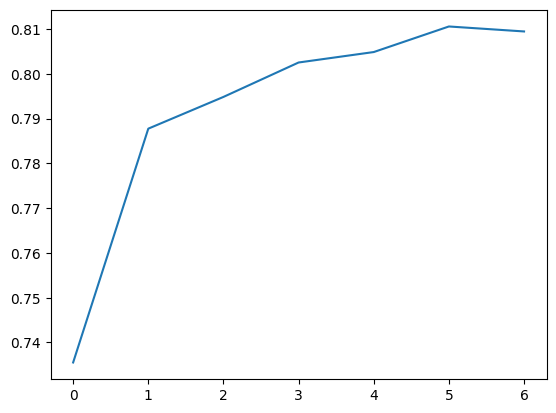

In [6]:
plt.plot(range(len(history["val_acc"])), history["val_acc"])

In [7]:
max(history["val_acc"])

tensor(0.8106)

In [8]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 